# Simple Linear Regression. Minimal example

### Import the relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Generate random input data to train on

In [2]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

inputs = np.column_stack((xs,zs))

print (inputs.shape)

(1000, 2)


### Generate the targets we will aim at

In [3]:
noise = np.random.uniform(-1, 1, (observations,1))

targets = 2*xs - 3*zs + 5 + noise

print (targets.shape)

(1000, 1)


### Plot the training data
The point is to see that there is a strong trend that our model should learn to reproduce.

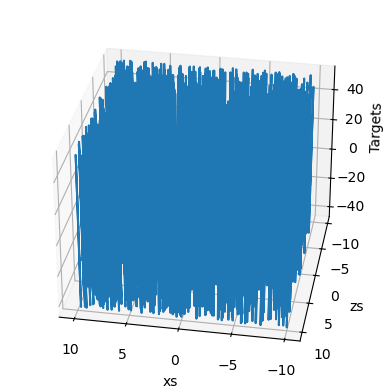

In [4]:
targets = targets.reshape(observations,)

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.plot(xs, zs, targets)

ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')

ax.view_init(azim=100)
plt.show()

targets = targets.reshape(observations,1)

### Initialize variables

In [5]:
init_range = 0.1
weights = np.random.uniform(low=-init_range, high=init_range, size=(2, 1))

biases = np.random.uniform(low=-init_range, high=init_range, size=1)

print (weights)
print (biases)

[[-0.01982448]
 [-0.01991523]]
[-0.01780987]


### Set a learning rate

In [6]:
learning_rate = 0.02

### Train the model

In [13]:
for i in range (100):
    
    outputs = np.dot(inputs,weights) + biases
    deltas = outputs - targets
        
    loss = np.sum(deltas ** 2) / 2 / observations
    
    print (loss)
    deltas_scaled = deltas / observations
    
    weights = weights - learning_rate * np.dot(inputs.T,deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)

0.16905943699618467
0.16890031353503945
0.16874747345214533
0.1686006686329757
0.16845966076041127
0.16832422092786625
0.16819412926769037
0.16806917459424342
0.16794915406106622
0.16783387283158707
0.16772314376283173
0.16761678710162317
0.16751463019277718
0.16741650719882106
0.1673222588307794
0.16723173208959075
0.16714478001773506
0.16706126146066885
0.1669810408376801
0.16690398792179206
0.1668299776283583
0.16675888981200454
0.1666906090715905
0.16662502456287082
0.16656202981855625
0.16650152257547832
0.16644340460857898
0.16638758157145678
0.1663339628432078
0.1662824613813162
0.16623299358035182
0.1661854791362493
0.16613984091594505
0.1660960048321632
0.16605389972314424
0.1660134572371249
0.16597461172137787
0.16593730011563396
0.16590146184971277
0.16586703874519554
0.1658339749209798
0.16580221670256515
0.16577171253492
0.16574241289878863
0.16571427023030438
0.16568723884377567
0.1656612748575222
0.1656363361226387
0.16561238215457233
0.16558937406740185
0.16556727451071

### Print weights and biases and see if we have worked correctly.

In [14]:
print (weights, biases)

[[ 1.99618279]
 [-2.99767384]] [4.99890677]


### Plot last outputs vs targets

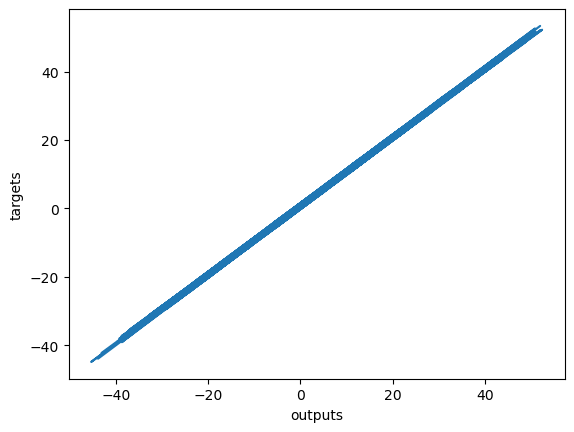

In [9]:
plt.plot(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()